## KF Basics - Part 2


### Probabilistic Generative Laws
 
#### 1st Law:
The belief representing the state $x_{t}$, is conditioned on all past states, measurements and controls. This can be shown mathematically by the conditional probability shown below:

$$p(x_{t} | x_{0:t-1},z_{1:t-1},u_{1:t})$$

1) $z_{t}$ represents the **measurement**

2) $u_{t}$ the **motion command**

3) $x_{t}$ the **state** (can be the position, velocity, etc) of the robot or its environment at time t.


'If we know the state $x_{t-1}$ and $u_{t}$, then knowing the states $x_{0:t-2}$, $z_{1:t-1}$ becomes immaterial through the property of **conditional independence**'. The state $x_{t-1}$ introduces a conditional independence between $x_{t}$ and $z_{1:t-1}$, $u_{1:t-1}$

Therefore the law now holds as:

$$p(x_{t} | x_{0:t-1},z_{1:t-1},u_{1:t})=p(x_{t} | x_{t-1},u_{t})$$

#### 2nd Law:

If $x_{t}$ is complete, then:

$$p(z_{t} | x-_{0:t},z_{1:t-1},u_{1:t})=p(z_{t} | x_{t})$$

$x_{t}$ is **complete** means that the past states, controls or measurements carry no additional information to predict future.

$x_{0:t-1}$, $z_{1:t-1}$ and $u_{1:t}$ are **conditionally independent** of $z_{t}$ given $x_{t}$ of complete.

The filter works in two parts:

$p(x_{t} | x_{t-1},u_{t})$ -> **State Transition Probability**

$p(z_{t} | x_{t})$ -> **Measurement Probability**


### Conditional dependence and independence example:


$\bullet$**Independent but conditionally dependent**

Let's say you flip two fair coins

A - Your first coin flip is heads

B - Your second coin flip is heads

C - Your first two flips were the same


A and B here are independent. However, A and B are conditionally dependent given C, since if you know C then your first coin flip will inform the other one.

$\bullet$**Dependent but conditionally independent**

A box contains two coins: a regular coin and one fake two-headed coin ((P(H)=1). I choose a coin at random and toss it twice. Define the following events.

A= First coin toss results in an H.

B= Second coin toss results in an H.

C= Coin 1 (regular) has been selected.                                                             

If we know A has occurred (i.e., the first coin toss has resulted in heads), we would guess that it is more likely that we have chosen Coin 2 than Coin 1. This in turn increases the conditional probability that B occurs. This suggests that A and B are not independent. On the other hand, given C (Coin 1 is selected), A and B are independent.


### Bayes Rule:


Posterior = $$\frac{Likelihood*Prior}{Marginal} $$

Here,

**Posterior** = Probability of an event occurring based on certain evidence.

**Likelihood** = How probable is the evidence given the event.

**Prior** = Probability of the just the event occurring without having any evidence.

**Marginal** = Probability of the evidence given all the instances of events possible.



Example:

1% of women have breast cancer (and therefore 99% do not).
80% of mammograms detect breast cancer when it is there (and therefore 20% miss it).
9.6% of mammograms detect breast cancer when its not there (and therefore 90.4% correctly return a negative result).

We can turn the process above into an equation, which is Bayes Theorem. Here is the equation:

$\displaystyle{\Pr(\mathrm{A}|\mathrm{X}) = \frac{\Pr(\mathrm{X}|\mathrm{A})\Pr(\mathrm{A})}{\Pr(\mathrm{X|A})\Pr(\mathrm{A})+ \Pr(\mathrm{X | not \ A})\Pr(\mathrm{not \ A})}}$


$\bullet$Pr(A|X) = Chance of having cancer (A) given a positive test (X). This is what we want to know: How likely is it to have cancer with a positive result? In our case it was 7.8%.

$\bullet$Pr(X|A) = Chance of a positive test (X) given that you had cancer (A). This is the chance of a true positive, 80% in our case.

$\bullet$Pr(A) = Chance of having cancer (1%).

$\bullet$Pr(not A) = Chance of not having cancer (99%).

$\bullet$Pr(X|not A) = Chance of a positive test (X) given that you didn't have cancer (~A). This is a false positive, 9.6% in our case.


### Bayes Filter Algorithm

The basic filter algorithm is:

for all $x_{t}$:

1. $\overline{bel}(x_t) = \int p(x_t | u_t, x_{t-1}) bel(x_{t-1})dx$

2. $bel(x_t) = \eta p(z_t | x_t) \overline{bel}(x_t)$

end.


$\rightarrow$The first step in filter is to calculate the prior for the next step that uses the bayes theorem. This is the **Prediction** step. The belief, $\overline{bel}(x_t)$, is **before** incorporating measurement($z_{t}$) at time t=t. This is the step where the motion occurs and information is lost because the means and covariances of the gaussians are added. The RHS of the equation incorporates the law of total probability for prior calculation.

$\rightarrow$ This is the **Correction** or update step that calculates the belief of the robot **after** taking into account the measurement($z_{t}$) at time t=t. This is where we incorporate the sensor information for the whereabouts of the robot. We gain information here as the gaussians get multiplied here. (Multiplication of gaussian values allows the resultant to lie in between these numbers and the resultant covariance is smaller.


### Bayes filter localization example:

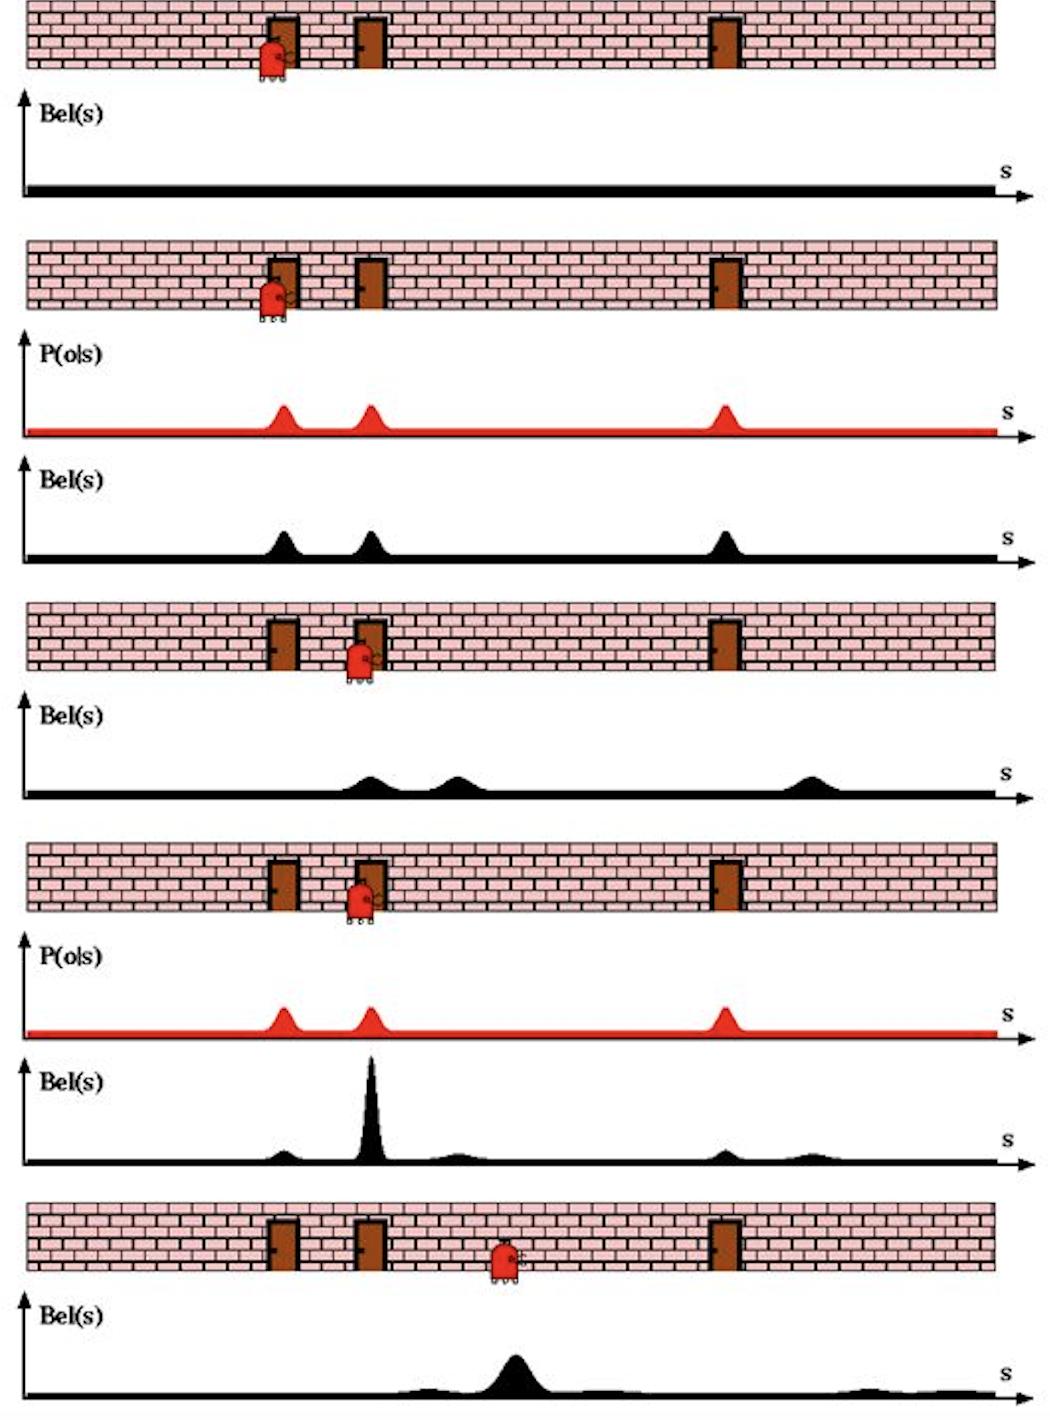

In [3]:
from IPython.display import Image
Image(filename="bayes_filter.png",width=400)


Given - A robot with a sensor to detect doorways along a hallway. Also, the robot knows how the hallway looks like but doesn't know where it is in the map. 


1. Initially(first scenario), it doesn't know where it is with respect to the map and hence the belief assigns equal probability to each location in the map.


2. The first sensor reading is incorporated and it shows the presence of a door. Now the robot knows how the map looks like but cannot localize yet as map has 3 doors present. Therefore it assigns equal probability to each door present. 


3. The robot now moves forward. This is the prediction step and the motion causes the robot to lose some of the information and hence the variance of the gaussians increase (diagram 4.). The final belief is **convolution** of posterior from previous step and the current state after motion. Also, the means shift on the right due to the motion.


4. Again, incorporating the measurement, the sensor senses a door and this time too the possibility of door is equal for the three door. This is where the filter's magic kicks in. For the final belief (diagram 5.), the posterior calculated after sensing is mixed or **convolution** of previous posterior and measurement. It improves the robot's belief at location near to the second door. The variance **decreases** and **peaks**.


5. Finally after series of iterations of motion and correction, the robot is able to localize itself with respect to the environment.(diagram 6.)

Do note that the robot knows the map but doesn't know where exactly it is on the map.

### Bayes and Kalman filter structure

The basic structure and the concept remains the same as bayes filter for Kalman. The only key difference is the mathematical representation of Kalman filter. The Kalman filter is nothing but a bayesian filter that uses Gaussians.

For a bayes filter to be a Kalman filter, **each term of belief is now a gaussian**, unlike histograms.  The basic formulation for the **bayes filter** algorithm is:

$$\begin{aligned} 
\bar {\mathbf x} &= \mathbf x \ast f_{\mathbf x}(\bullet)\, \, &\text{Prediction} \\
\mathbf x &= \mathcal L \cdot \bar{\mathbf x}\, \, &\text{Correction}
\end{aligned}$$


$\bar{\mathbf x}$ is the *prior* 

$\mathcal L$ is the *likelihood* of a measurement given the prior $\bar{\mathbf x}$

$f_{\mathbf x}(\bullet)$ is the *process model* or the gaussian term that helps predict the next state like velocity
to track position or acceleration.

$\ast$ denotes *convolution*.





### Kalman Gain


$$ x = (\mathcal L \bar x)$$

Where x is posterior and $\mathcal L$ and $\bar x$ are gaussians.

Therefore the mean of the posterior is given by:

$$
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2}
$$


$$\mu = \left( \frac{\bar\sigma^2}{\bar\sigma^2 + \sigma_z^2}\right) \mu_z + \left(\frac{\sigma_z^2}{\bar\sigma^2 + \sigma_z^2}\right)\bar\mu$$

In this form it is easy to see that we are scaling the measurement and the prior by weights: 

$$\mu = W_1 \mu_z + W_2 \bar\mu$$


The weights sum to one because the denominator is a normalization term. We introduce a new term, $K=W_1$, giving us:

$$\begin{aligned}
\mu &= K \mu_z + (1-K) \bar\mu\\
&= \bar\mu + K(\mu_z - \bar\mu)
\end{aligned}$$

where

$$K = \frac {\bar\sigma^2}{\bar\sigma^2 + \sigma_z^2}$$

The variance in terms of the Kalman gain:

$$\begin{aligned}
\sigma^2 &= \frac{\bar\sigma^2 \sigma_z^2 } {\bar\sigma^2 + \sigma_z^2} \\
&= K\sigma_z^2 \\
&= (1-K)\bar\sigma^2 
\end{aligned}$$


$K$ is the *Kalman gain*. It's the crux of the Kalman filter. It is a scaling term that chooses a value partway between $\mu_z$ and $\bar\mu$.

### Kalman Filter - Univariate and Multivariate


<u>**Prediction**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$

$\mathbf x,\, \mathbf P$ are the state mean and covariance. They correspond to $x$ and $\sigma^2$.

$\mathbf F$ is the *state transition function*. When multiplied by $\bf x$ it computes the prior. 

$\mathbf Q$ is the process covariance. It corresponds to $\sigma^2_{f_x}$.

$\mathbf B$ and $\mathbf u$ are model control inputs to the system.

<u>**Correction**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T (\mathbf{H\bar{P}H}^\mathsf T + \mathbf R)^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar{P}} \\
\hline
\end{array}$

$\mathbf H$ is the measurement function.

$\mathbf z,\, \mathbf R$ are the measurement mean and noise covariance. They correspond to $z$ and $\sigma_z^2$ in the univariate filter. 
$\mathbf y$ and $\mathbf K$ are the residual and Kalman gain. 

The details will be different than the univariate filter because these are vectors and matrices, but the concepts are exactly the same: 

-  Use a Gaussian to represent our estimate of the state and error
-  Use a Gaussian to represent the measurement and its error
-  Use a Gaussian to represent the process model
-  Use the process model to predict the next state (the prior)
-  Form an estimate part way between the measurement and the prior

### References:

1. Roger Labbe's [repo](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python) on Kalman Filters. (Majority of text in the notes are from this)



2. Probabilistic Robotics by Sebastian Thrun, Wolfram Burgard and Dieter Fox, MIT Press.
